<a href="https://colab.research.google.com/github/Jahnavi-Jaolekar/Play-Store-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Problem Statement<b>
## <b>The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

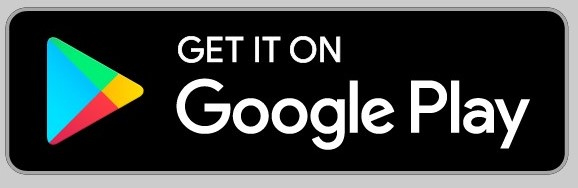

In [ ]:
Title_of_the_project= "abc"

In [75]:
# Importing necessary libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## **Let's mount our data**

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
# Store the data in a variable and view it
data1='/content/drive/MyDrive/capstone project/Copy of Play Store Data.csv'
data2='/content/drive/MyDrive/capstone project/Copy of User Reviews.csv'
play_store = pd.read_csv(data1)
user_review = pd.read_csv(data2)
play_store.head()
#user_review.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## **Determining number of rows and columns of play store data**

In [79]:
# Determining the shape of play store data
print(f'number of rows:{play_store.shape[0]}')
print(f'number of columns:{play_store.shape[1]}')

number of rows:10841
number of columns:13


## **Determining number of rows and columns of user review data**

In [80]:
# Determining the shape of user review  data
print(f'number of rows:{user_review.shape[0]}')
print(f'number of columns:{user_review.shape[1]}')

number of rows:64295
number of columns:5


## **Let's just dig into the data a bit more!!**


In [81]:
# Columns is an attribute that returns column labels, which helps to understand which column contains what type of information.
play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [82]:
# similarly we will be finding out column labels for user review data as well .
user_review.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [83]:

user_review.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [84]:
# Defining a function to to determine number of null values,unique values and data type of all values
def give_info():
  extra_info = pd.DataFrame(index=play_store.columns)
  extra_info['data_type'] = play_store.dtypes
  extra_info['null_count'] = play_store.isnull().sum()
  extra_info['unique_count'] = play_store.nunique()
  return extra_info
  

In [85]:
give_info()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120








*   This shows that this data contains 1474 null values in rating column, current ver has 8, android ver has 3, content rating and type each have 1 null value.
*   Only rating has numeric values in the form of floats.





In [86]:
# Defining a function to to determine number of null values,unique values and data type of all values for user review data.
def return_info():
  more_info = pd.DataFrame(index=user_review.columns)
  more_info['data_type'] = user_review.dtypes
  more_info['null_count'] = user_review.isnull().sum()
  more_info['unique_count'] = user_review.nunique()
  return more_info

In [87]:
return_info()

,data_type,null_count,unique_count
App,object,0,1074
Translated_Review,object,26868,27994
Sentiment,object,26863,3
Sentiment_Polarity,float64,26863,5410
Sentiment_Subjectivity,float64,26863,4474


# **Dealing with null values in play store data**

In [88]:
# Defining a function to calculate median for particular columns
def impute_median(series):
  return series.fillna(series.median)

In [89]:
# Replacing null values in rating column with median of all values present in that column
play_store.Rating=play_store['Rating'].transform(impute_median)

In [90]:
# Removing/droping the row containg null value for the column content rating
play_store[play_store['Content Rating'].isna()]
play_store.drop([10472],inplace=True)

In [91]:
# Null values of type,Current Ver,Android Ver, columns are replaced with mode of respective columns.
# Mode is most recurring value of that particular column, so null values are being replaced by mode.
play_store['Type'].fillna(str(play_store['Type'].mode().values[0]),inplace=True)
play_store['Current Ver'].fillna(str(play_store['Current Ver'].mode().values[0]),inplace=True)
play_store['Android Ver'].fillna(str(play_store['Android Ver'].mode().values[0]),inplace=True)

In [92]:
# Check if still null values are present
play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# **Dealing with null values in user review data**

In [93]:
# Replacing null values in sentiment polarity column with median of all values present in that column
user_review.Sentiment_Polarity=user_review['Sentiment_Polarity'].transform(impute_median)

In [94]:
# Replacing null values in Sentiment_Subjectivity column with median of all values present in that column
user_review.Sentiment_Subjectivity=user_review['Sentiment_Subjectivity'].transform(impute_median)

In [95]:
# Null values of type,Current Ver,Android Ver, columns are replaced with mode of respective columns.
user_review['Sentiment'].fillna(str(user_review['Sentiment'].mode().values[0]),inplace=True)

In [96]:
# Check if still null values are present
user_review.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                     0
Sentiment_Polarity            0
Sentiment_Subjectivity        0
dtype: int64

# **Now let's check for duplicate values in play store data**

In [97]:
#Presence of duplicate values, if any...
print("Number of Unique App Names=",len(play_store['App'].unique()))
print("Number of total app Name=",play_store.shape[0])
print("Duplicate apps=",len(play_store['App'])-len(play_store['App'].unique()))

Number of Unique App Names= 9659
Number of total app Name= 10840
Duplicate apps= 1181


In [98]:
#Examining the appearence of Duplicate values
play_store[play_store['App'] == 'Coloring book moana']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2033,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [100]:
play_store.drop_duplicates(subset='App',keep='first',inplace=True)
play_store.shape

(9659, 13)

# **Now let's check for duplicate values in user review data**

In [101]:
#Presence of duplicate values, if any...
print("Number of Unique App Names=",len(user_review['App'].unique()))
print("Number of total app Name=",user_review.shape[0])
print("Duplicate apps=",len(user_review['App'])-len(user_review['App'].unique()))

Number of Unique App Names= 1074
Number of total app Name= 64295
Duplicate apps= 63221


# **What is to be cleaned?**

### *   Reviews: It has to be a numerical column and datatype into int/float

### *   Size: Every Entry has "M" and "K" which needs to be removed and datatype into int/float
### *   Installs: Every entry has "+" at the end which needs to be removed and datatype into int/float also it has entries like "Free"

### *   Price: It has "S" at the begining it needs to be cleaned and datatype into int/float





### **Review Column**

In [106]:
 # Columns review should be of int type
play_store['Reviews'] = pd.to_numeric(play_store['Reviews'],errors='coerce')
give_info()

TypeError: ignored

### **Size Column**

In [103]:
# Removing the ',' and '+' Signs
play_store['Size'] = play_store.Size.apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
play_store['Size'] = play_store.Size.apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))

In [119]:
# Convert M to Mega
play_store['Size'] = play_store.Size.apply(lambda x: str(x).replace('M', '*1024') if 'M' in str(x) else str(x))

# Convert the K to Kilo
play_store['Size'] = play_store.Size.apply(lambda x: str(x).replace('k', '') if 'k' in str(x) else str(x))

# Replacing the Varies with device value with Nan
play_store['Size'] = play_store.Size.replace('Varies with device', np.NaN)
play_store

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19e+6,NaN,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14e+6,NaN,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7e+6,NaN,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25e+6,NaN,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8e+6,NaN,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53e+6,NaN,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6e+6,NaN,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,<bound method NDFrame._add_numeric_operations....,3,9.5e+6,NaN,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,nan,NaN,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
# Convert Size Column from object to integer
play_store['Size'] = pd.to_numeric(play_store['Size'],errors='coerce')
give_info()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,float64,1,6001
Size,float64,10841,0
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


### **Installs Column**

In [109]:
#Remove '+' sign from 
play_store['Installs'] = play_store.Installs.apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))

# Remove the ',' from the numbers.
play_store['Installs'] = play_store.Installs.apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))

# Convert it from string type to numeric type
play_store['Installs'] = pd.to_numeric(play_store['Installs'],errors='coerce')

### **Price Column**

In [110]:
# Remove'$' sign
play_store['Price'] = play_store.Price.apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))

# Convert the values to Numeric type.
play_store['Price'] = pd.to_numeric(play_store['Price'],errors='coerce')
play_store.describe()

,Reviews,Installs,Price
count,9.659000e+03,1.0,9659.000000
mean,2.165926e+05,0.0,1.099299
std,1.831320e+06,NaN,16.852152
min,0.000000e+00,0.0,0.000000
25%,2.500000e+01,0.0,0.000000
50%,9.670000e+02,0.0,0.000000
75%,2.940100e+04,0.0,0.000000
max,7.815831e+07,0.0,400.000000


In [ ]:
give_info()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,float64,1,6001
Size,object,0,1
Installs,float64,1,20
Type,object,1,3
Price,float64,1,92
Content Rating,object,1,6
Genres,object,0,120


In [120]:
play_store.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs          9658
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

# **Data Visualization for play store data**

In [112]:
play_store['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [125]:
x2 = play_store['Content Rating'].value_counts().index
y2 = play_store['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

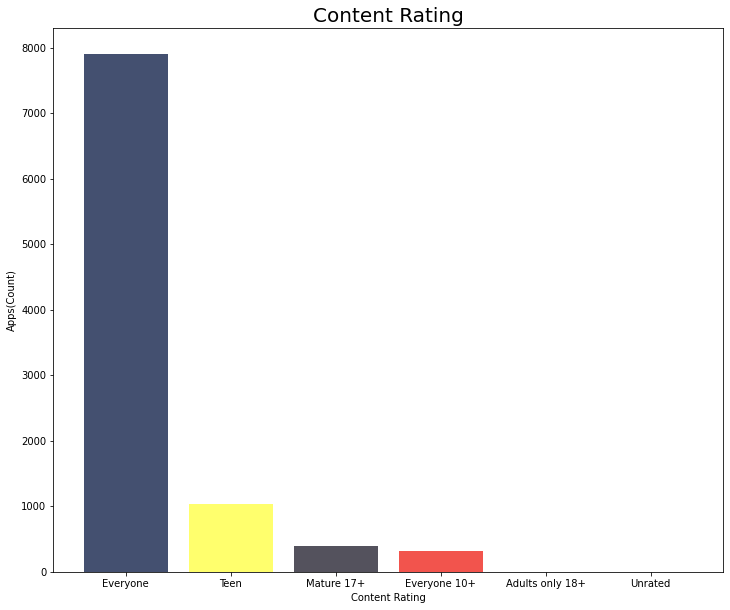

In [126]:
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');